<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Data%20Analysis/Level%202/outlier_detection_%26_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Outlier Detection & Distributions

_**Goal: Identify outliers and understand how your data is distributed**._


## What You’ll Learn
- How to detect outliers using:
    - Boxplots
    - Z-scores
    - IQR (Interquartile Range)

- How to analyze distributions using:
    - Histograms
    - KDE (Kernel Density Estimation)
- How to describe shape: normal, skewed, multimodal

## Step 1: Import Required Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 2: Create Sample Dataset

In [2]:
# Sample data with some outliers
np.random.seed(42)
data = pd.DataFrame({
    'Scores': np.append(np.random.normal(loc=70, scale=10, size=100), [150, 160, 170])
})

data.head()

,Scores
0,74.967142
1,68.617357
2,76.476885
3,85.230299
4,67.658466


## Step 3: Outlier Detection - Boxplot


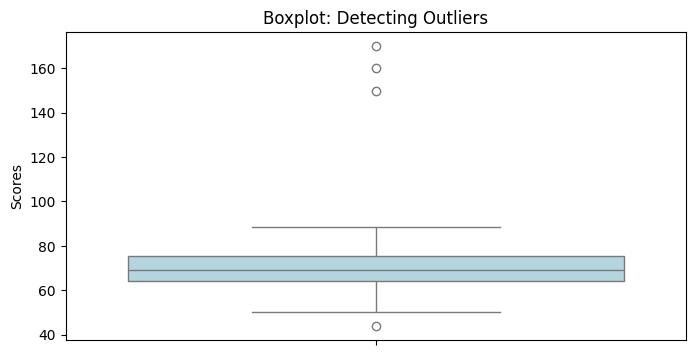

In [3]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['Scores'], color='lightblue')
plt.title('Boxplot: Detecting Outliers')
plt.show()

> **Interpretation**: Points beyond the whiskers are considered outliers.

## Step 4: Outlier Detection - Z-score




In [4]:
# Calculate z-scores
z_scores = stats.zscore(data['Scores'])

# Absolute z-score > 3 is typically considered an outlier
outliers_z = data[np.abs(z_scores) > 3]
print("Z-score Outliers:\n", outliers_z)

Z-score Outliers:
      Scores
100   150.0
101   160.0
102   170.0


## Step 5: Outlier Detection - IQR Method


In [5]:
Q1 = data['Scores'].quantile(0.25)
Q3 = data['Scores'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['Scores'] < lower_bound) | (data['Scores'] > upper_bound)]
print("IQR Outliers:\n", outliers_iqr)

IQR Outliers:
          Scores
74    43.802549
100  150.000000
101  160.000000
102  170.000000


## Step 6: Analyze Distribution - Histogram & KDE


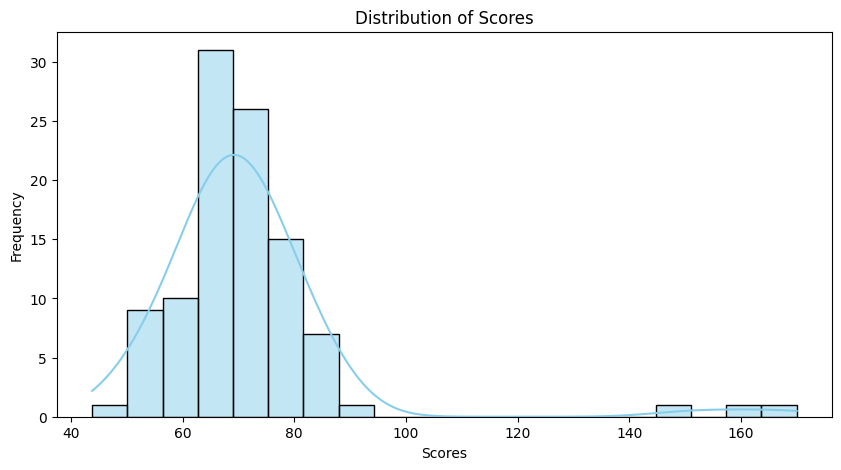

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Scores'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

> KDE line helps visualize if the data is normally distributed or skewed.

## Step 7: Skewness and Kurtosis

In [7]:
skew = data['Scores'].skew()
kurt = data['Scores'].kurt()

print(f"Skewness: {skew:.2f}")
print(f"Kurtosis: {kurt:.2f}")

Skewness: 3.59
Kurtosis: 16.86


- Skewness:
    - ~0 → symmetric
    - > 0 → right-skewed (tail on right)
    - <0 → left-skewed

- Kurtosis:
    - > 0 → heavy tails (outliers more likely)
    - <0 → light tails

## Summary

| Technique     | Use Case                                |
|:------------- |:--------------------------------------- |
| Boxplot       | Visual detection of outliers            |
| Z-score       | Standardized method (assumes normality) |
| IQR           | Works even with skewed data             |
| Histogram/KDE | Understand shape: normal, skewed, etc.  |
